1. adaptive gaussian thresholding 
2. dialation
3. houghlines

In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Dilation

In [129]:
kernel1 = np.ones((1,1),np.uint8)
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel10 = np.ones((10,10),np.uint8)
kernel20 = np.ones((20,20),np.uint8)

krn = [kernel1, kernel3, kernel5, kernel10, kernel20]

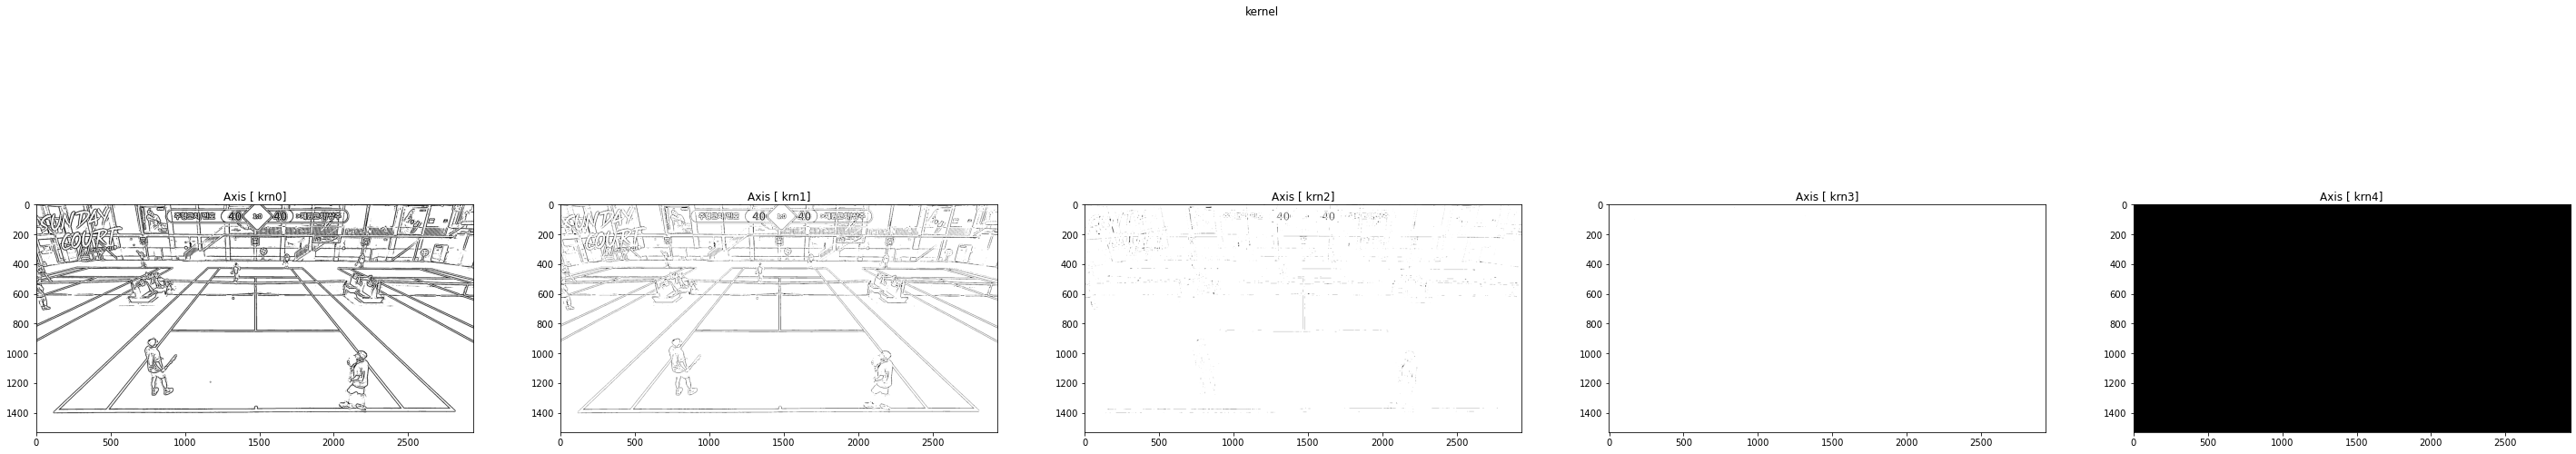

In [130]:
fig, axs = plt.subplots(1, 5, figsize=(50,10))
fig.suptitle('kernel')

for i in range(5):
    dilation = cv2.dilate(th3,krn[i],iterations = 1)
    axs[i].imshow(dilation,'gray')
    axs[i].set_title('Axis [ krn' + str(i) + ']')

In [216]:
def plot(rows, cols, figsize, title, images):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(title)
    for a in range(rows):
        for b in range(cols):
            axs[a, b].imshow(images[a][b], 'gray')
            axs[a, b].set_title('Axis [' + str(a) + str(b) + ']')

In [191]:
high = np.array([232, 229, 227])
low = np.array([203, 196, 169])

img = cv2.imread('tn1.png')
imgi = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rng = cv2.inRange(imgi, low, high)
edges = cv2.Canny(rng,50,150,apertureSize=3)
edges2 = cv2.Canny(rng,50,150,apertureSize=5)

kernel3 = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges2,kernel3,iterations = 1)

In [202]:
arr = [ [edges, edges2], [dilation, img]]

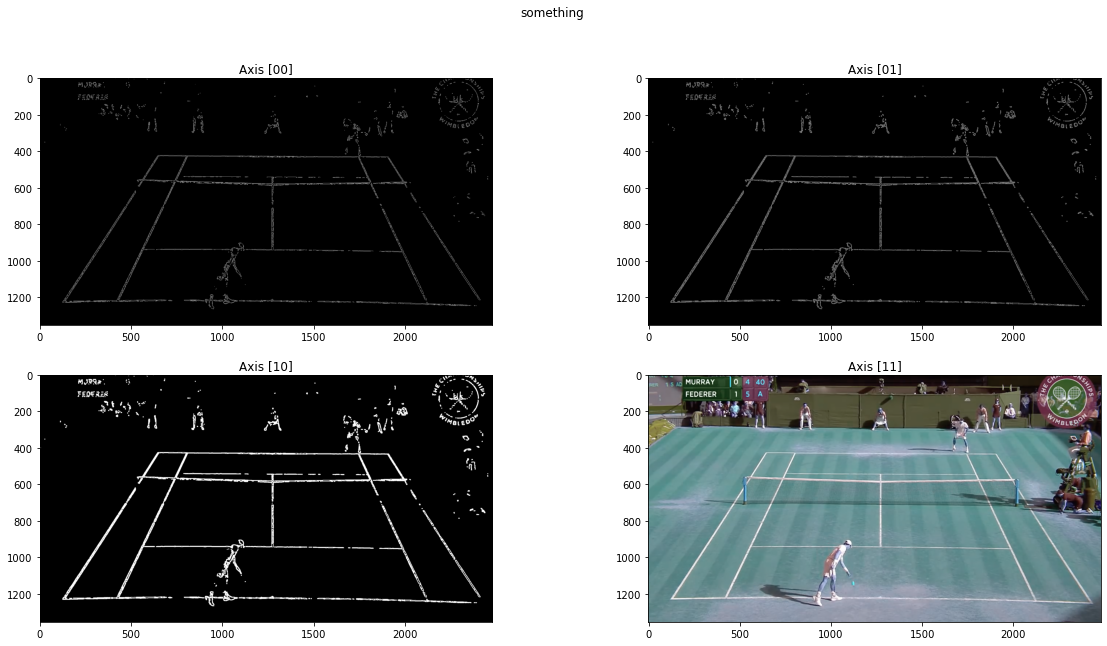

In [203]:
plot(2,2,(20,10), 'arr', arr)

In [219]:
lines1 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=100)
lines2 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=200)
lines3 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 1000, maxLineGap=100)
lines4 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 1000, maxLineGap=200)


red = (255,0,0)
img1= img.copy()
img2= img.copy()
img3= img.copy()
img4= img.copy()

for line in lines1:
    x1, y1, x2, y2 = line[0]
    img1 = cv2.line(img1, (x1, y1), (x2,y2), red)

for line in lines2:
    x1, y1, x2, y2 = line[0]
    img2 = cv2.line(img2, (x1, y1), (x2,y2), red)

for line in lines3:
    x1, y1, x2, y2 = line[0]
    img3 = cv2.line(img3, (x1, y1), (x2,y2), red)

for line in lines4:
    x1, y1, x2, y2 = line[0]
    img4 = cv2.line(img4, (x1, y1), (x2,y2), red)

images = [[img1, img2], [img3, img4]]
plot(2,2,(20,10), 'Houghlines', images)

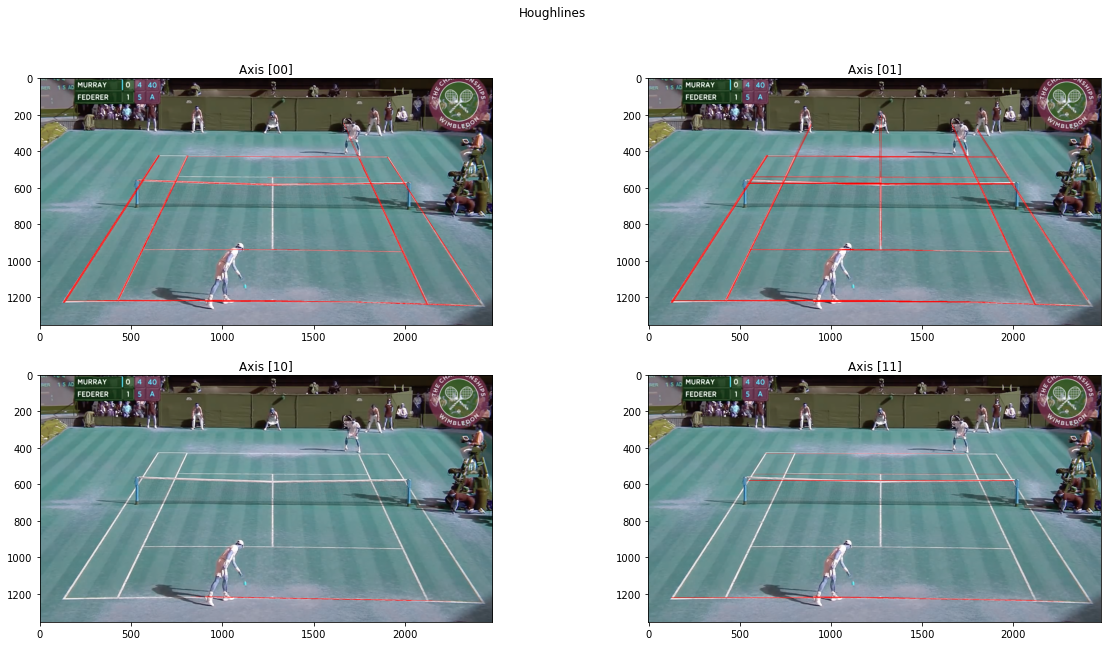

In [220]:
plot(2,2,(20,10), 'Houghlines', images)

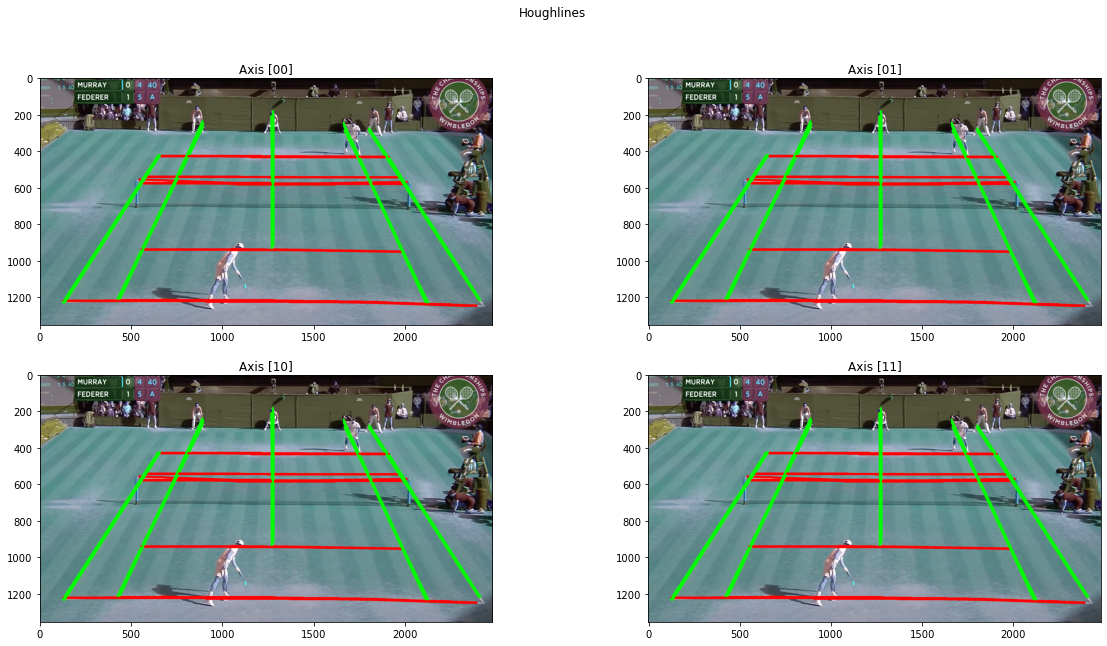

In [263]:
lines5 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=120)
lines6 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=140)
lines7 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=160)
lines8 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 500, maxLineGap=180)

red = (255,0,0)
img1= img.copy()
img2= img.copy()
img3= img.copy()
img4= img.copy()

for line in lines5:
    if y2-100 < y1 < y2 + 100:
        img1 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img1 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines6:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img2 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img2 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines7:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img3 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img3 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines8:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img4 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img4 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

images = [[img1, img2], [img3, img4]]
plot(2,2,(20,10), 'Houghlines', images)

In [242]:
lines5[0], lines5[1], 

(array([[ 851, 1216, 2246, 1240]], dtype=int32),
 array([[ 419, 1226,  807,  429]], dtype=int32))

In [245]:
lines5.shape, lines6.shape,lines7.shape, lines8.shape

((71, 1, 4), (77, 1, 4), (80, 1, 4), (85, 1, 4))

In [246]:
lines4.shape

(12, 1, 4)

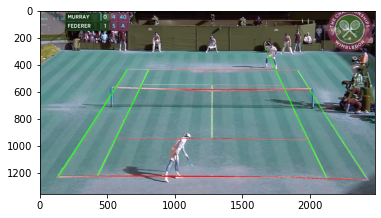

In [236]:
for line in lines5:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img1 = cv2.line(img1, (x1, y1), (x2,y2), red)
    else: 
        img1 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0))

plt.imshow(img1)
    

In [231]:
gray = np.float32(dilation)
dilation.shape, dilation.dtype, gray.shape, gray.dtype,

((1354, 2478), dtype('uint8'), (1354, 2478), dtype('float32'))

In [248]:
lines9 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 900, maxLineGap=200)
lines9.shape

(37, 1, 4)

1. verti vs hori
2. verti --> x1 or x2 

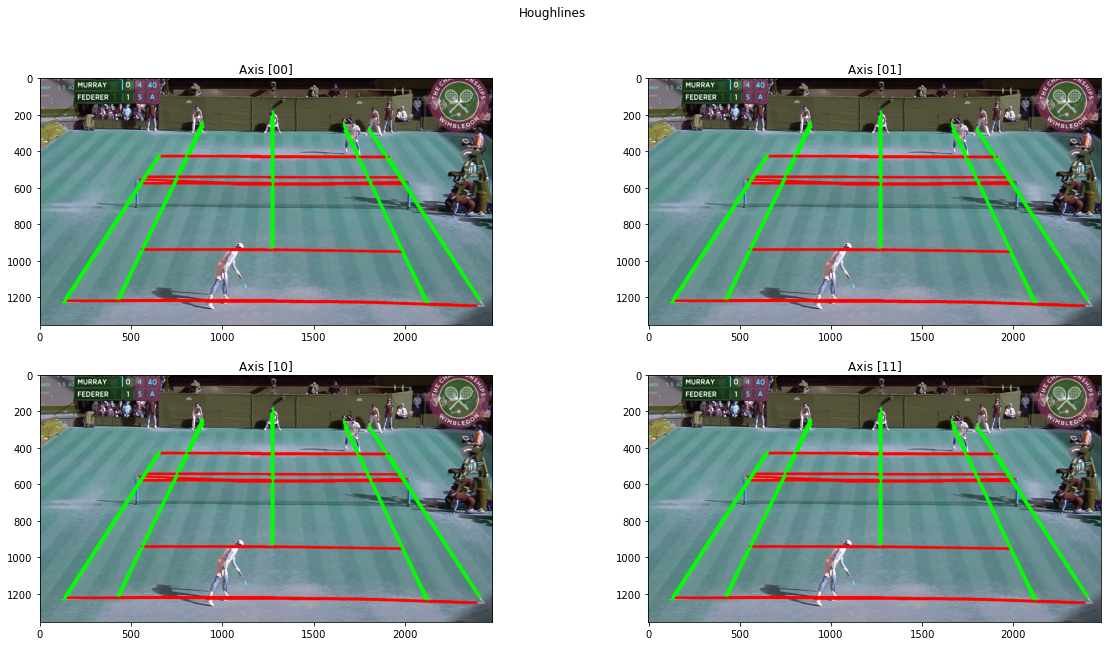

In [264]:
lines9 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 800, maxLineGap=100)
lines10 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 800, maxLineGap=200)
lines11 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 900, maxLineGap=100)
lines12 = cv2.HoughLinesP(edges2,1,np.pi/180,100, minLineLength = 900, maxLineGap=200)

thickness = 9 

red = (255,0,0)
img1= img.copy()
img2= img.copy()
img3= img.copy()
img4= img.copy()

for line in lines5:
    if y2-100 < y1 < y2 + 100:
        img1 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img1 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines6:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img2 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img2 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines7:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img3 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img3 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

for line in lines8:
    x1, y1, x2, y2 = line[0]
    if y2-100 < y1 < y2 + 100:
        img4 = cv2.line(img1, (x1, y1), (x2,y2), red, thickness)
    else: 
        img4 = cv2.line(img1, (x1, y1), (x2,y2), (0,255,0), thickness)

images = [[img1, img2], [img3, img4]]
plot(2,2,(20,10), 'Houghlines', images)

In [250]:
lines9.shape, lines10.shape, lines11.shape, lines12.shape, 

((22, 1, 4), (59, 1, 4), (10, 1, 4), (37, 1, 4))

In [268]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Detector parameters
blockSize = 2
apertureSize = 3
k = 0.04
# Detecting corners
dst = cv2.cornerHarris(img1, blockSize, apertureSize, k)

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
